### Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [2]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Import the Data

train = pd.read_csv("train_bigmart.csv")
test = pd.read_csv("test_bigmart.csv")

train.shape, test.shape

((8523, 12), (5681, 11))

#### Framework of Model Building

**Exploratory Data Analysis**

    * Univariate Analysis
    * Bivariate Analysis
    * Missing Value Imputation
    * Outlier Analysis and treatment
    * Feature Engineering
    * Statistical Hypothesis Testing
    * Categorical Variable Analysis & Encoding
    * Scaling and Transformation
  
Note: Post EDA you have entered the Pre Modeling Stage. 

**Models**

    * Base Models - Average in case of Linear Regression
    * In Case of Classification - Highest Frequency
    * Linear Regression
    * Tree Based Models - Decision Tree, RandomForest,
    Gradient Boosting machines etc.
    * Remember that all the models shall be Cross
    Validated Models.
    
    

In [15]:
# Combine the Train and Test Set

combined = pd.concat([train, test], 
                     ignore_index = True)

combined.shape, train.shape, test.shape

((14204, 12), (8523, 12), (5681, 11))

### Univariate Analysis

* It Represents Single Variable Analysis
* Num Vars: Distplot/Histogram
* Cat Vars: Countplot

In [16]:
# Lets pull the list of Num vars...
nums = combined.select_dtypes(include = np.number)\
.columns

cats = combined.select_dtypes(exclude = np.number)\
.columns

<Figure size 800x600 with 0 Axes>

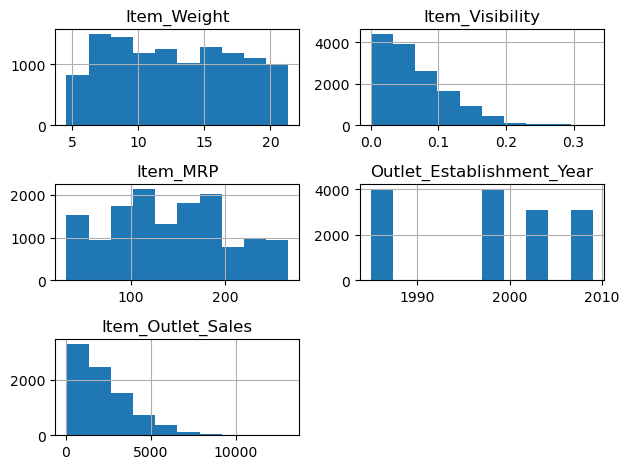

In [17]:
plt.figure(figsize = (8, 6))
combined.loc[:, nums].hist()
plt.tight_layout()
plt.show()

<Axes: xlabel='Item_MRP', ylabel='Density'>

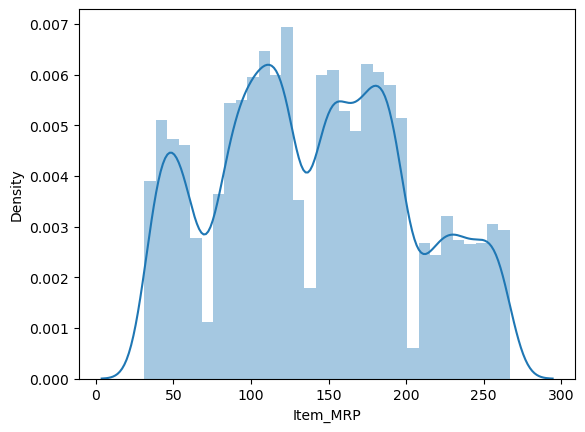

In [18]:
sns.distplot(combined.Item_MRP)

In [19]:
combined.loc[:, nums].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


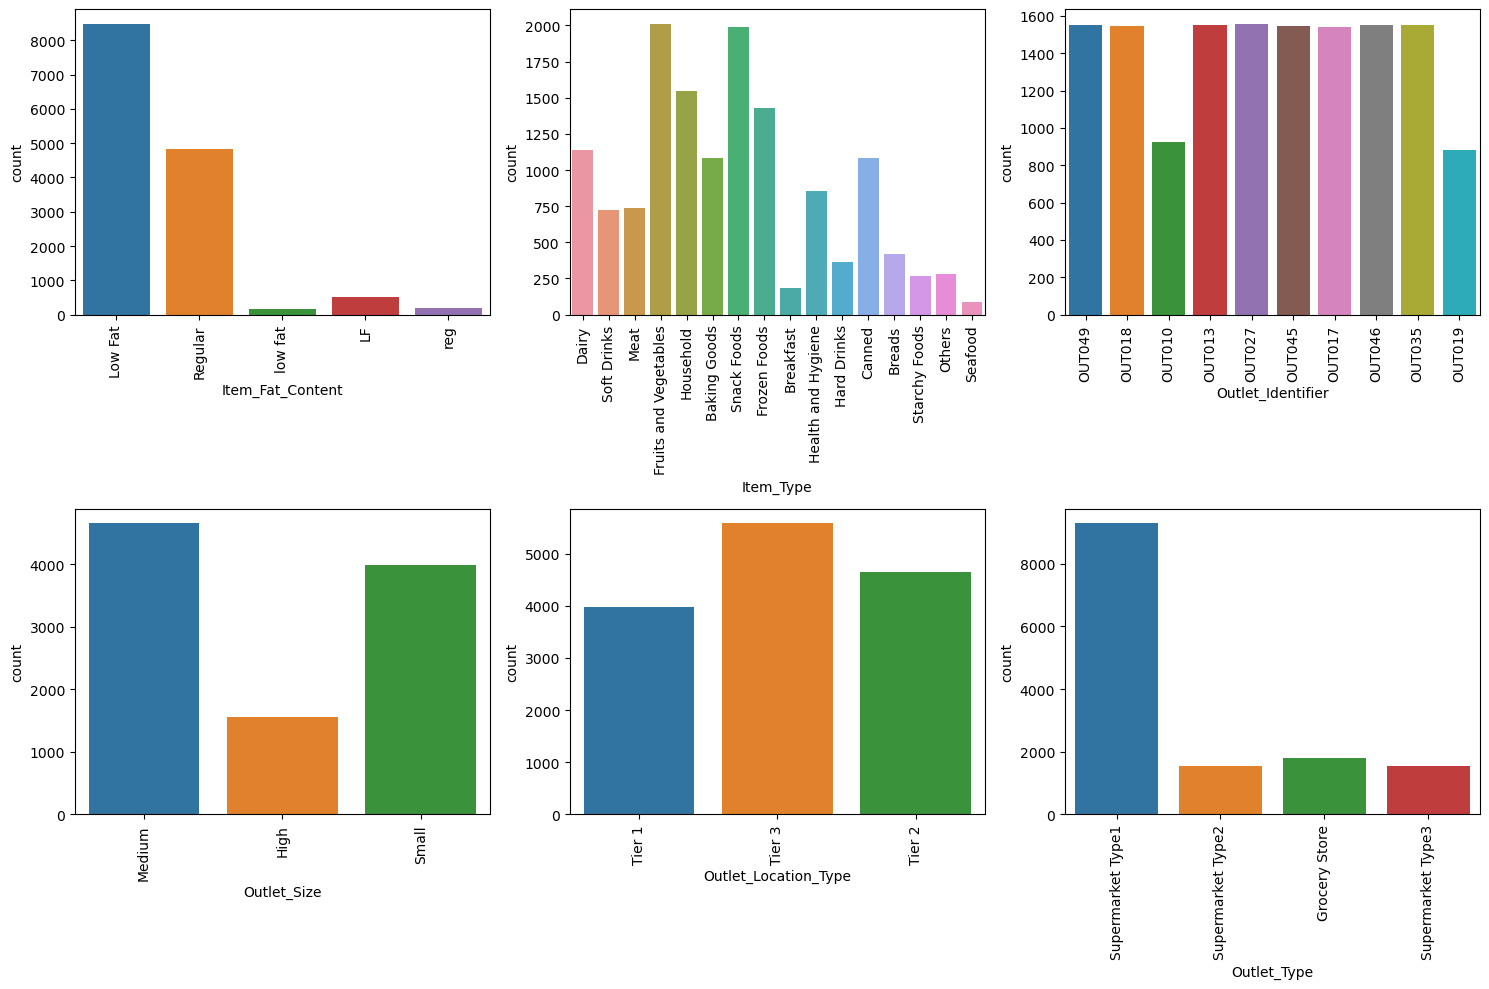

In [25]:
# Cats
cat_cols = ['Item_Fat_Content', 'Item_Type', 
            'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 
            'Outlet_Type']

nrows = 2
ncols = 3
iterator = 1

plt.figure(figsize = (15, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:, i])
    iterator+=1
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

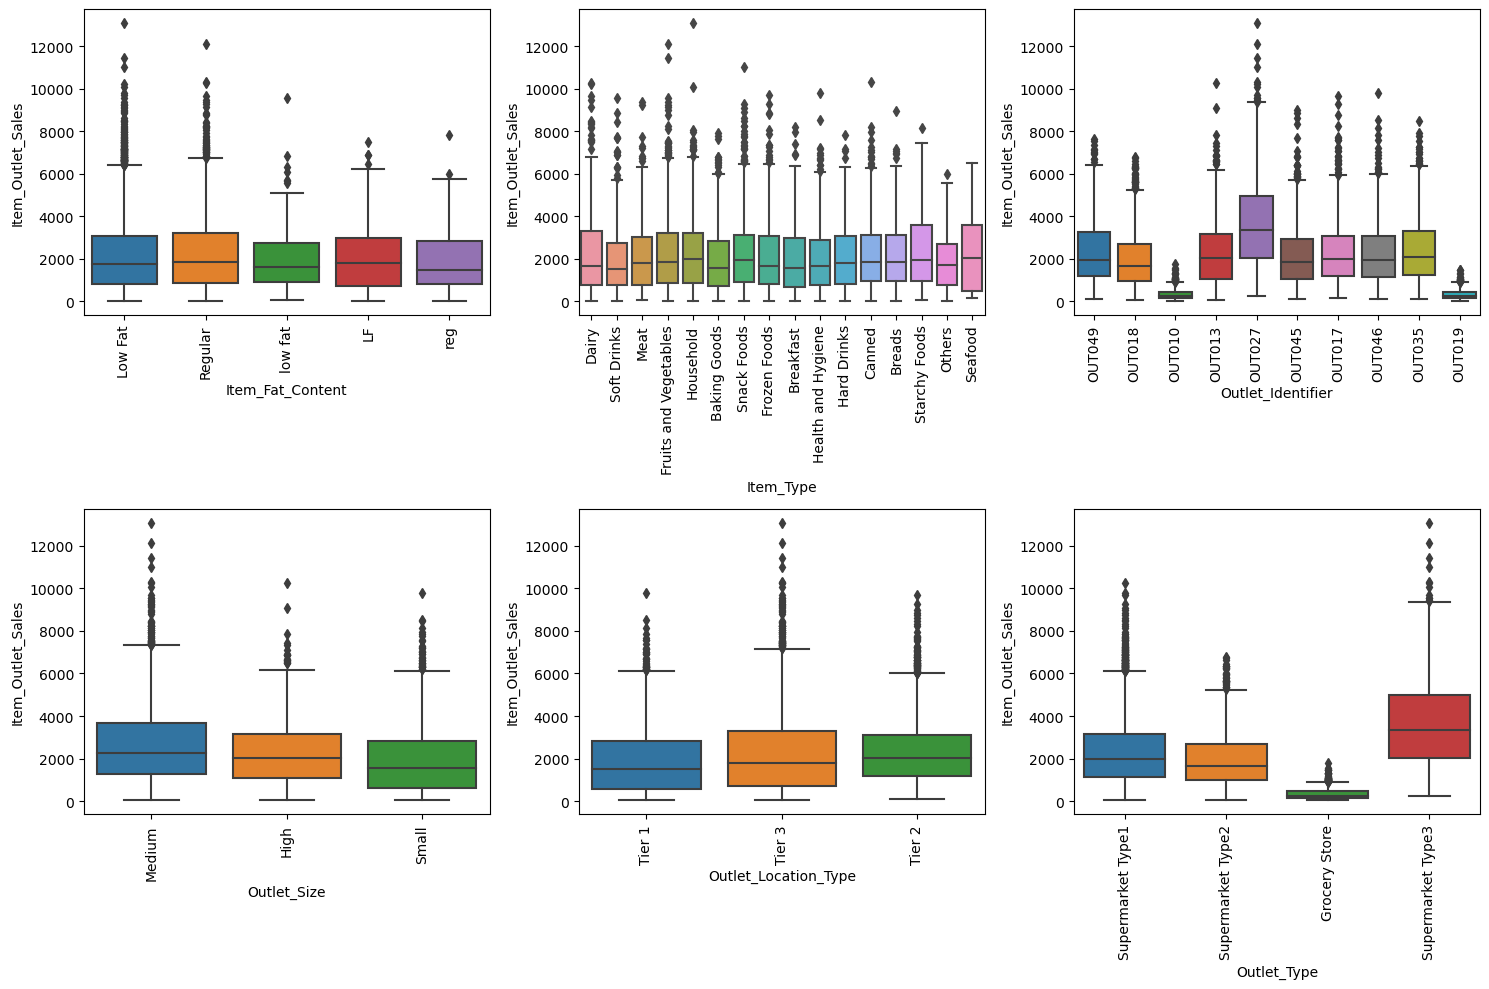

In [27]:
# Bivariate Analysis - Cat vs Number

nrows = 2
ncols = 3
iterator = 1

plt.figure(figsize = (15, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:, i], 
                  combined.Item_Outlet_Sales)
    iterator+=1
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

In [20]:
# Item Fat Content

combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],
                                 value = ['Low Fat',
                                         'Low Fat', 'Regular'], 
                                  inplace = True)

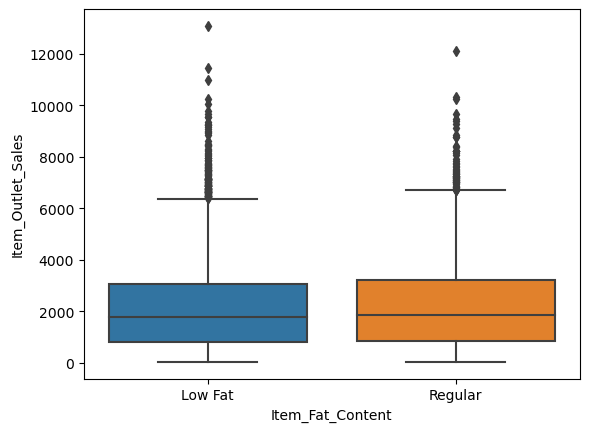

In [22]:
# Fat Content vs Sales
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales",
           data = combined)
plt.show()

In [23]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

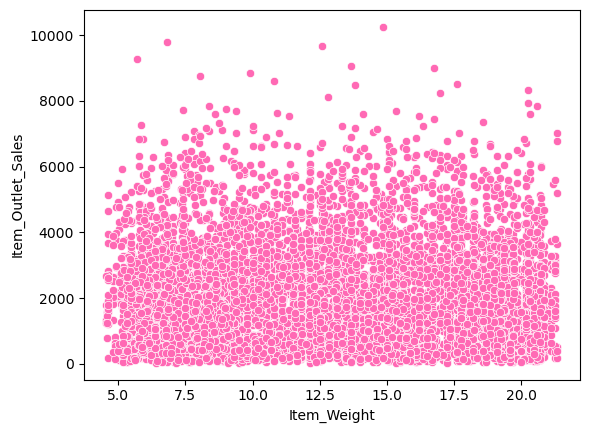

In [10]:
# Item Weight vs Sales
sns.scatterplot(x = "Item_Weight", y = "Item_Outlet_Sales",
               data = combined, color = "hotpink")
plt.show()

# Conclusion: That the Weight has no relation with the sales

In [14]:
# Pull a DataFrame head where Item Weight is Missing
combined.loc[combined.Item_Weight.isnull(), ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


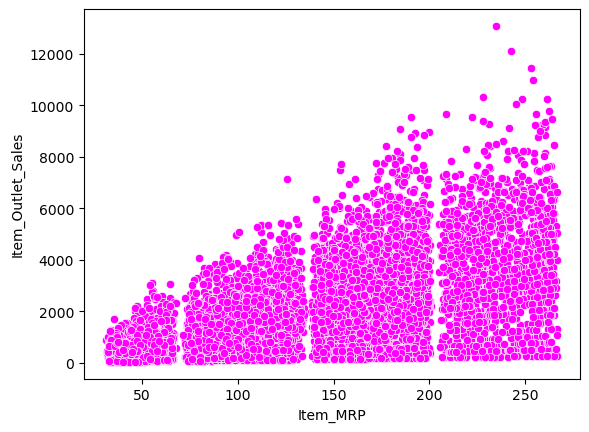

In [16]:
sns.scatterplot(x = "Item_MRP", y = "Item_Outlet_Sales",
               data = combined, color = "magenta")
plt.show()

# Conclusion: Since we know that the MRP is combined and thus
# we see a combined effect with Sales.

# We understand that the MRP is Multimodal data which leads to multiple
# transactions combined together.

# Hence, we can conclude that there is combination effect on MRP
# vs Sales..

In [24]:
combined.loc[combined.Item_Identifier=="FDP10", "Item_Weight"]

7         NaN
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327     NaN
Name: Item_Weight, dtype: float64

In [25]:
# Dictionary...
mapped = combined.groupby("Item_Identifier")["Item_Weight"]\
.mean().to_dict()
mapped

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.8,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.589999999999999,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.2700000000000005,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.8,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,
 'DRG36': 14.15,
 'DRG37'

In [29]:
# Impute the Missing Values
combined["Item_Weight"] = combined.groupby("Item_Identifier")\
["Item_Weight"].apply(lambda x:x.fillna(x.mean()))
combined["Item_Weight"]

0         9.30
1         5.92
2        17.50
3        19.20
4         8.93
         ...  
14199    10.50
14200     7.60
14201    10.00
14202    15.30
14203     9.50
Name: Item_Weight, Length: 14204, dtype: float64

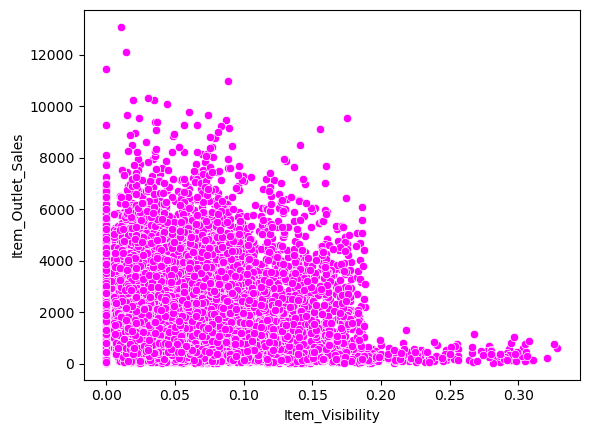

In [27]:
sns.scatterplot(x = "Item_Visibility", y = "Item_Outlet_Sales",
               data = combined, color = "magenta")
plt.show()

In [31]:
# Impute the Missing Values
combined["Item_Visibility"] = combined.groupby("Item_Identifier")\
["Item_Visibility"].apply(lambda x:x.replace(to_replace = 0,
                                             value = x.mean()))
combined["Item_Visibility"]

0        0.016047
1        0.019278
2        0.016760
3        0.017834
4        0.009780
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.088380
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [32]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [30]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [27]:
combined.groupby(["Outlet_Identifier", 
                  "Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: Outlet_Size, dtype: int64

In [34]:
combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Size"]="Small"

### Feature Engineering

1. Item Identifier

In [35]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [39]:
ids = []
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [40]:
combined["Item_IDS"] = pd.Series(ids)

In [41]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [42]:
perish = ['Dairy','Meat', 'Fruits and Vegetables',
         'Breakfast''Breads', 'Starchy Foods','Seafood']

In [43]:
def badaldo(x):
    if x in perish:
        return("Perishables")
    else:
        return("Non_Perishables")

In [45]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(badaldo)

<AxesSubplot:xlabel='Item_Type_Cat', ylabel='Item_Outlet_Sales'>

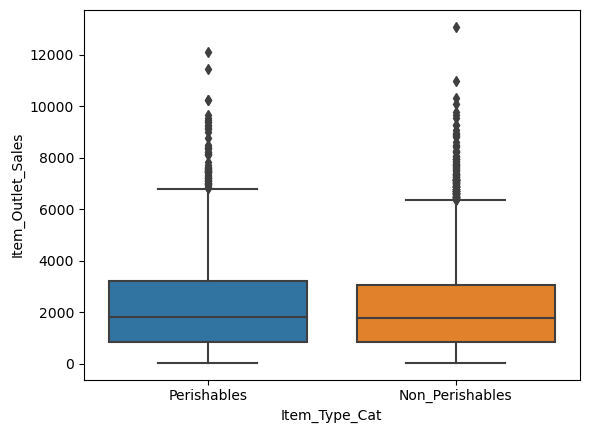

In [46]:
# Pattern between Item Type Cat vs Sales

sns.boxplot(x = "Item_Type_Cat", y  ="Item_Outlet_Sales",
           data = combined)

In [47]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables


In [51]:
combined.loc[combined.Item_IDS=="NC", 
             "Item_Fat_Content"]="Non_Edible"

In [52]:
# Outlets.
top = ["OUT027", "OUT013"]
worst = ["OUT010", "OUT019"]

def outlets(x):
    if x in top:
        return("Best")
    elif x in worst:
        return("Worst")
    else:
        return("Good")

In [53]:
combined["Outlets"] = combined.Outlet_Identifier.apply(outlets)

<AxesSubplot:xlabel='Outlets', ylabel='Item_Outlet_Sales'>

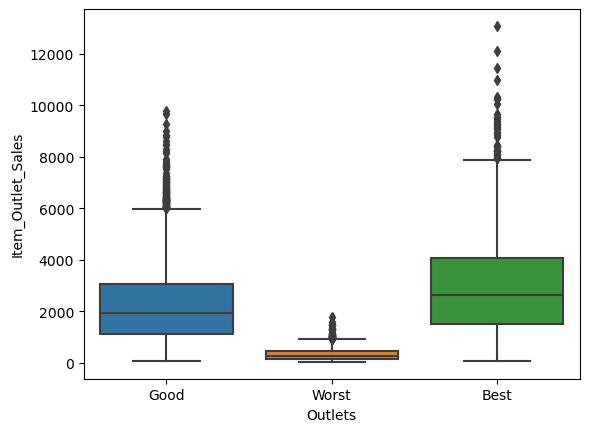

In [54]:
# Pattern between Item Type Cat vs Sales

sns.boxplot(x = "Outlets", y  ="Item_Outlet_Sales",
           data = combined)

In [55]:
# Drop the Unnecessary Columns now
combined.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier",
              "Outlet_Establishment_Year"], axis =1, 
              inplace = True)

In [56]:
# Categorical Encoding


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Item_Type_Cat,Outlets
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,Good
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,Good
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,Good
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,Worst
4,8.93,Non_Edible,0.009780,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,Best


In [58]:
# Outlet Size
mapped_size = {"Medium":3, "High":2, "Small":1}
mapped_outlet = {"Best":3, "Good":2, "Worst":1}
mapped_loc = {"Tier 3":3, "Tier 1":2, "Tier 2":1}

#combined.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe()

In [64]:
combined["Outlet_Size"] = combined["Outlet_Size"].map(mapped_size)
combined["Outlets"] = combined["Outlets"].map(mapped_outlet)
combined["Outlet_Location_Type"] = combined["Outlet_Location_Type"].map(mapped_loc)

In [66]:
# one hot encoding
dummy = pd.get_dummies(combined, drop_first = True)

In [68]:
# Split the Data into Train and Test
newtrain = dummy.loc[0:train.shape[0]-1, ]
newtest = dummy.loc[train.shape[0]:, ]

In [70]:
# Drop the Target from the Test set
newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

### Model Building

In [71]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, 
Ridge, Lasso, ElasticNet


In [72]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

X = newtrain.drop("Item_Outlet_Sales", axis =1)
y = newtrain.Item_Outlet_Sales

lr = LinearRegression()

predictions = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    validn_test = X.iloc[test_index]
    validn_ytest = y.iloc[test_index]
    # Model
    pred = lr.fit(xtrain, ytrain).predict(newtest)
    predictions.append(pred)

In [78]:
finalpred = pd.DataFrame(predictions).T.mean(axis = 1)

In [81]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(finalpred)})

In [84]:
# Export it as Csv
submission.to_csv("LRMODEL_Bigmart.csv", index = False) # 1194.0955978656157

In [85]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

X = newtrain.drop("Item_Outlet_Sales", axis =1)
y = newtrain.Item_Outlet_Sales

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

predictions = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    validn_test = X.iloc[test_index]
    validn_ytest = y.iloc[test_index]
    # Model
    pred = rf.fit(xtrain, ytrain).predict(newtest)
    predictions.append(pred)

In [86]:
finalpred = pd.DataFrame(predictions).T.mean(axis = 1)

In [87]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(finalpred)})

In [90]:
# Export it as Csv
submission.to_csv("RF_Bigmart.csv", index = False) # 1194.0955978656157

In [89]:
cd

C:\Users\IT
